<a href="https://colab.research.google.com/github/marcelounb/tensorflow_udacity/blob/master/02_fashion_mnist_CNNs_my_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

# Imports for the CNN
from keras.layers import Flatten 
from keras.layers.convolutional import Convolution2D 
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K 
from random import randrange

In [2]:
import tensorflow as tf
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Loading Data (baixando data)

In [3]:
#  - Udacity -----------------------
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']
#  - Udacity -----------------------

In [4]:
# load (downloaded if needed) the MNIST dataset 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [6]:
#  - Udacity -----------------------
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))
#  - Udacity -----------------------

Number of training examples: 60000
Number of test examples:     10000


In [7]:
print("Number of training examples: {}".format(len(X_train)))
print("Number of test examples:     {}".format(len(X_test)))
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

Number of training examples: 60000
Number of test examples:     10000


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

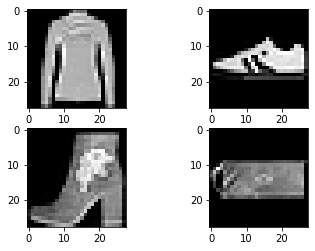

In [8]:
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[randrange(0, len(X_train))], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(222) 
plt.imshow(X_train[randrange(0, len(X_train))], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[randrange(0, len(X_train))], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[randrange(0, len(X_train))], cmap=plt.get_cmap( 'gray' ))
# show the plot 
plt.show()

# Normalization (Normalizacao)

In [9]:
#  - Udacity -----------------------
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()
#  - Udacity -----------------------

In [10]:
# Next we need to reshape the MNIST dataset so that it is suitable for use training a CNN. 
# In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [channels][width][height]. 
# In the case of RGB, the ﬁrst dimension channels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. 
# In the case of MNIST where the channels values are gray scale, the pixel dimension is set to 1.
# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( 'float32' )

In [11]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [20]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
print(f'X_train: {X_train[0][0][20]}')
print(f'X_test: {X_test[0][0][20]}')

X_train: [0.]
X_test: [0.]


In [13]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255
X_test = X_test / 255 

In [14]:
print(f'X_train: {X_train[0][0][20]}')
print(f'X_test: {X_test[0][0][20]}')

X_train: [0.29411766 0.8        0.83137256 0.8        0.75686276 0.8039216
 0.827451   0.88235295 0.84705883 0.7254902  0.77254903 0.80784315
 0.7764706  0.8352941  0.9411765  0.7647059  0.8901961  0.9607843
 0.9372549  0.8745098  0.85490197 0.83137256 0.81960785 0.87058824
 0.8627451  0.8666667  0.9019608  0.2627451 ]
X_test: [0.0627451  0.49411765 0.67058825 0.7372549  0.7372549  0.72156864
 0.67058825 0.6        0.5294118  0.47058824 0.49411765 0.49803922
 0.57254905 0.7254902  0.7647059  0.81960785 0.8156863  1.
 0.81960785 0.69411767 0.9607843  0.9882353  0.9843137  0.9843137
 0.96862745 0.8627451  0.80784315 0.19215687]


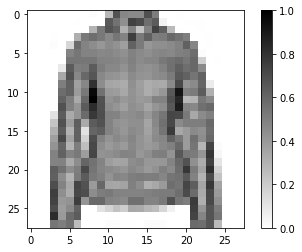

In [15]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

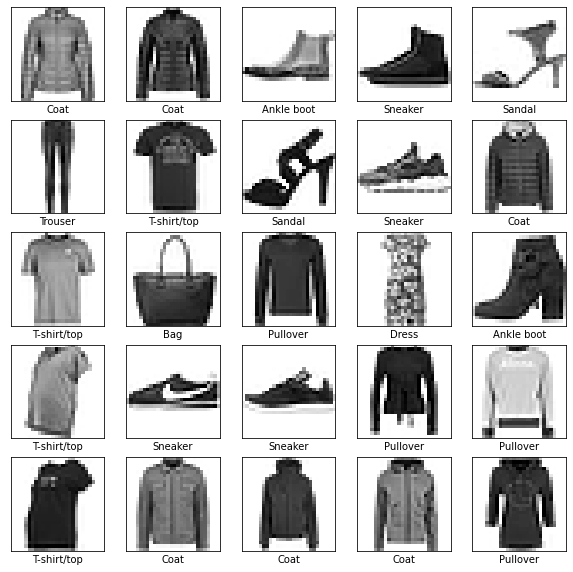

In [16]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

# Building the model

In [17]:
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Flatten(input_shape=(28,28,1)))
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(10, activation= 'softmax' )) 

  # Compile model 
  model.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

In [25]:
def cnn_model():
  # create model 
  model = Sequential() 
  model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1), activation= 'relu' )) 
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2)) 
  model.add(Convolution2D(64, (3, 3), padding='same', activation='relu' )) 
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  
  model.add(Flatten()) 
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(10, activation= 'softmax' ))

  # Compile model 
  model.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

In [36]:
def cnn_model_my_way():
  # create model 
  model = Sequential() 
  model.add(Convolution2D(32, (3, 3), input_shape=(1, 28, 28), activation= 'relu' )) 
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2)) 
  model.add(Convolution2D(64, (3, 3), padding='same', activation='relu' )) 
  model.add(MaxPooling2D(pool_size=(2, 2), strides=2))  
  model.add(Flatten()) 
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(10, activation= 'softmax' ))


  # Compile model 
  model.compile(loss= 'sparse_categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

# Fitting the Model Udacity

In [34]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [21]:
# build the model 
model = cnn_model() 
# Fit the model 
history = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.4221 - accuracy: 0.8461
Epoch 2/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2775 - accuracy: 0.8981
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2285 - accuracy: 0.9157
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1944 - accuracy: 0.9281
Epoch 5/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1708 - accuracy: 0.9370
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1500 - accuracy: 0.9436
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1256 - accuracy: 0.9529
Epoch 8/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1105 - accuracy: 0.9594
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0937 - accuracy: 0.9648
Epoch 10/10
1875/1875 [==============================] - 65s 34m

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.97 (or 97%) on the training data.

In [22]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 0.2890 - accuracy: 0.9182
Accuracy on test dataset: 0.9182000160217285


As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. This is completely normal, since the model was trained on the train_dataset. When the model sees images it has never seen during training, (that is, from the test_dataset), we can expect performance to go down.

# Fitting the model - My way around

In [37]:
# build the model 
model2 = cnn_model_my_way() 
K.set_image_data_format('channels_first')
# Fit the model 
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# -------------------------------------------------------- parei aqui


ValueError: ignored

# Make predictions and explore

In [13]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [14]:
predictions.shape

(32, 10)

In [15]:
predictions[0]

array([6.7169767e-06, 4.1211085e-10, 1.3100250e-04, 1.1693200e-08,
       8.4721965e-01, 4.7058499e-11, 1.5264249e-01, 6.0241079e-12,
       9.2293621e-12, 7.4158031e-08], dtype=float32)

In [16]:
np.argmax(predictions[0])

4

In [17]:
test_labels[0]

4

In [18]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

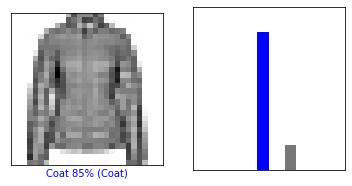

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

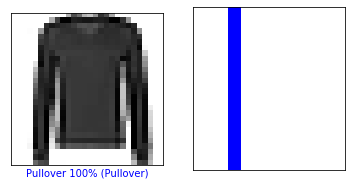

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

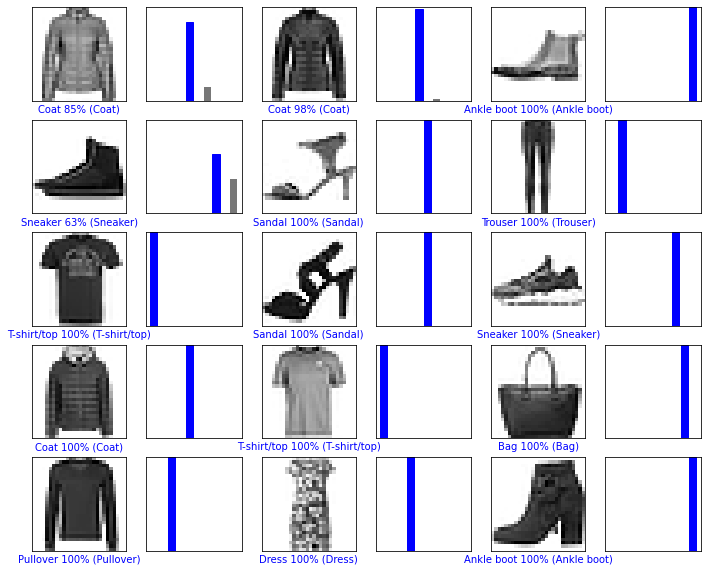

In [21]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [22]:
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [23]:
# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

(1, 28, 28, 1)


In [24]:
predictions_single = model.predict(img)

print(predictions_single)

[[6.7169781e-06 4.1211018e-10 1.3100253e-04 1.1693181e-08 8.4721982e-01
  4.7058239e-11 1.5264231e-01 6.0240979e-12 9.2293456e-12 7.4157619e-08]]


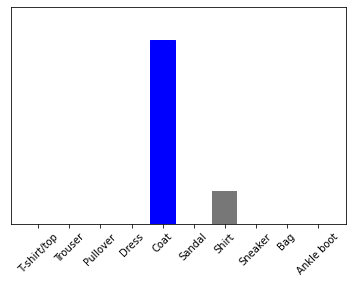

In [25]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [26]:
np.argmax(predictions_single[0])

4